In [6]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import data_load

In [7]:
frame = data_load.get_cdc_dataframe ()

In [9]:
target = {}
for model in frame["Model"].unique():
    model_frame = frame[(frame["Model"]==model) & (frame["target"] == "1 wk ahead inc case")][["target_end_date", "point"]]
    for i in model_frame.index:
        if model_frame.loc[i].target_end_date in target.keys():
            target[model_frame.loc[i].target_end_date] += 1
        else:
            target[model_frame.loc[i].target_end_date] = 1            
target_df = pd.DataFrame.from_dict(target, orient='index')

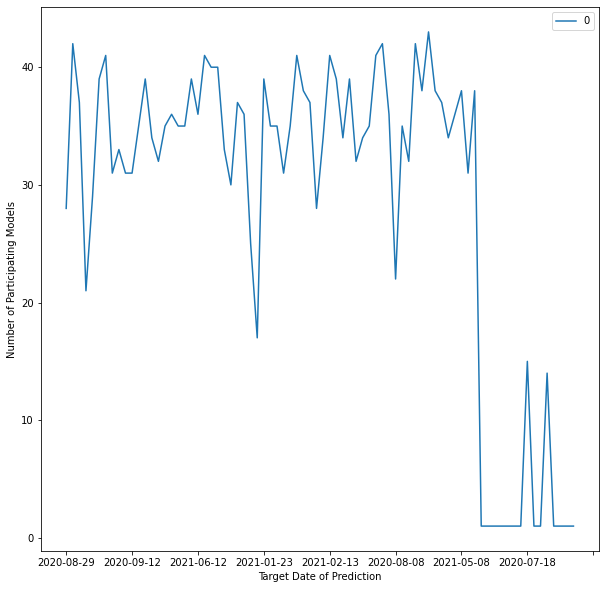

In [16]:
ax = target_df.plot(figsize=(10,10))
ax.set(ylabel="Number of Participating Models", xlabel = "Target Date of Prediction")
plt.savefig('plots/model_pred_timeline.png', bbox_inches='tight', dpi=150)

In [18]:
frame

,Unnamed: 0,location,target,forecast_date,target_end_date,point,Model
0,0,US,1 wk ahead inc case,2020-08-24,2020-08-29,39548.285714,COVIDhub-4_week_ensemble
1,1,US,2 wk ahead inc case,2020-08-24,2020-09-05,35558.714286,COVIDhub-4_week_ensemble
2,2,US,3 wk ahead inc case,2020-08-24,2020-09-12,32725.428571,COVIDhub-4_week_ensemble
3,3,US,4 wk ahead inc case,2020-08-24,2020-09-19,29245.142857,COVIDhub-4_week_ensemble
4,4,US,1 wk ahead inc case,2021-02-01,2021-02-06,142240.714286,COVIDhub-4_week_ensemble
...,...,...,...,...,...,...,...
12724,12724,US,4 wk ahead inc case,2020-07-05,2020-08-01,73483.929548,Covid19Sim-Simulator
12725,12725,US,5 wk ahead inc case,2020-07-05,2020-08-08,80511.095723,Covid19Sim-Simulator
12726,12726,US,6 wk ahead inc case,2020-07-05,2020-08-15,88088.408447,Covid19Sim-Simulator
12727,12727,US,7 wk ahead inc case,2020-07-05,2020-08-22,96076.840282,Covid19Sim-Simulator


In [19]:
df_heatmap = frame[frame["target"] == "1 wk ahead inc case"][["Model","target_end_date", "point"]]
df_heatmap['target_end_date'] = pd.to_datetime(df_heatmap['target_end_date'])
df_heatmap['target_end_date'] = df_heatmap['target_end_date'].dt.date
df_heatmap = df_heatmap[df_heatmap["Model"]!="DDS-NBDS"]
pivot = df_heatmap.pivot(index='Model', columns='target_end_date', values='point')

ValueError: Index contains duplicate entries, cannot reshape

In [7]:
sns.heatmap(pivot, cmap="rocket_r")

NameError: name 'sns' is not defined

In [8]:
df_heatmap = frame[frame["target"] == "1 wk ahead inc case"][["Model","target_end_date", "point"]]
df_heatmap["point"] = 1
df_heatmap['target_end_date'] = df_heatmap['target_end_date'].dt.date
df_heatmap = df_heatmap[df_heatmap["Model"]!="DDS-NBDS"]
pivot = df_heatmap.pivot(index='Model', columns='target_end_date', values='point')

ax = sns.heatmap(pivot, cmap="rocket_r")
ax.set(ylabel="Model Name", xlabel = "Target Date of Prediction")
plt.savefig('plots/model_pred_heatmap.png', bbox_inches='tight', dpi=150)

NameError: name 'sns' is not defined

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

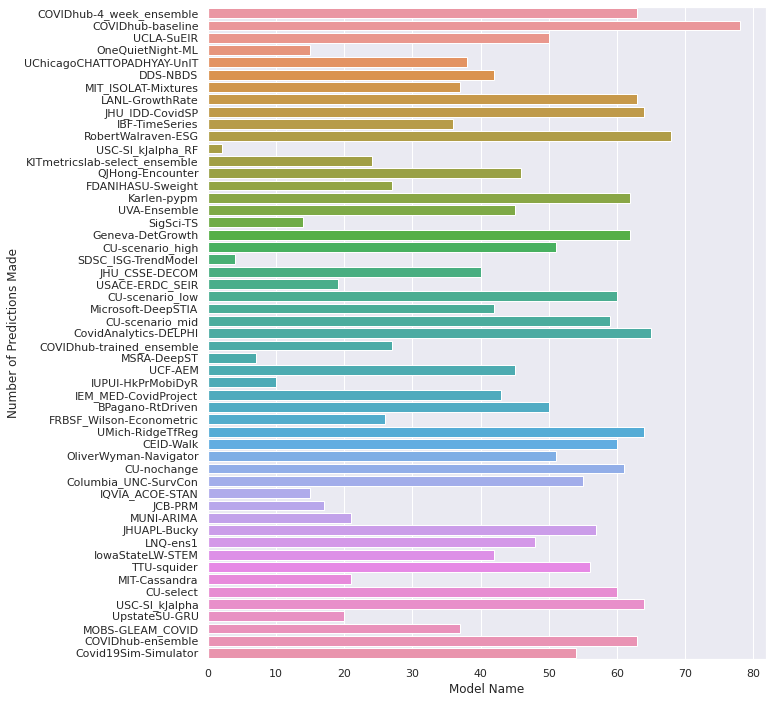

In [23]:
sns.set(rc={'figure.figsize':(10,12)})
ax = sns.countplot(y ='Model', data = frame[frame["target"] == "1 wk ahead inc case"])
ax.set(xlabel="Model Name", ylabel = "Number of Predictions Made")
plt.savefig('plots/model_pred_count.png', bbox_inches='tight', dpi=150)